In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

### Q5 : Planetary orbits

In [14]:
# parameters

a = 1 # semi-major axis (AU)
e = 0.15 # eccentricity
Rp = a*(1-e) # distance of perihelion from the focus
Vp = np.sqrt((4*(np.pi**2)/a)*(1+e)/(1-e))


# equation functions

def r(x):
    return np.sqrt(x[0]**2 + x[1]**2)

def rhs(t, x):
    xdot = x[2]
    ydot = x[3]
    vxdot = - 4*(np.pi**2)*x[0]/r(x)**3
    vydot = - 4*(np.pi**2)*x[1]/r(x)**3

    return np.array([xdot, ydot, vxdot, vydot])

In [15]:
# initial conditions
X0 = np.array([Rp, 0, 0, Vp])
print(X0)

[0.85      0.        0.        7.3083498]


In [16]:
def ode_integrate(X0, dt, tmax):
    r = integrate.solve_ivp(rhs, (0.0, tmax), X0, method="RK45", dense_output=True)
    
    ts = np.arange(0.0, tmax, dt)
    Xs = r.sol(ts)
    
    return ts, Xs

In [17]:
t, X = ode_integrate(X0, 0.005, 10)

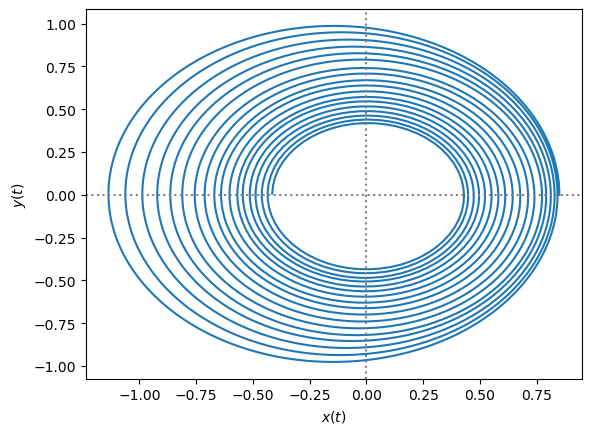

In [18]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(X[0,:], X[1,:])
ax.axhline(y=0, color='grey', ls=':')
ax.axvline(x=0, color='grey', ls=':')
ax.set_xlabel(r'$x(t)$')
ax.set_ylabel(r'$y(t)$');

### Q7 : Noisy signal

In [30]:
from scipy import signal

In [31]:
# noisy data we wish to smooth
def fdata(x, L):
    A = L/10.0
    return 2*np.sin(2*np.pi*x/L) + x*(L-x)**2/L**3 * np.cos(x) + \
           5*x*(L-x)/L**2 + A/2 + 0.1*A*np.sin(13*np.pi*x/L)

N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5*np.random.randn(N)

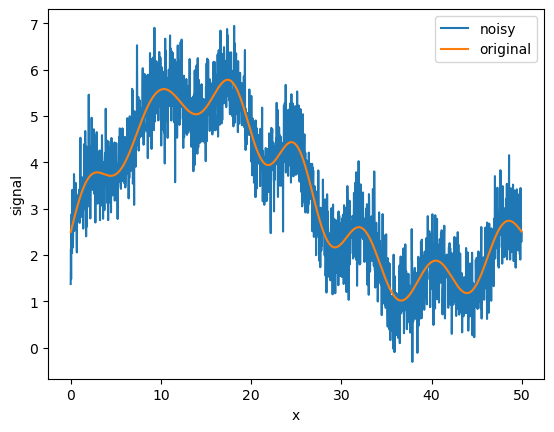

In [32]:
plt.plot(x, noisy, label='noisy')
plt.xlabel('x')
plt.ylabel('signal')
plt.plot(x, orig, label='original')
plt.legend()
plt.show()

In [33]:
w_gauss = signal.windows.gaussian(N, std=33)
w_gauss = w_gauss / np.sum(w_gauss) # normalization

In [34]:
conv = signal.convolve(noisy, w_gauss, mode='same')

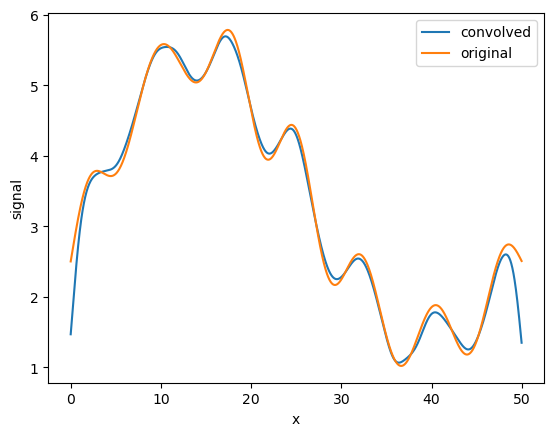

In [35]:
plt.plot(x, conv, label='convolved')
plt.plot(x, orig, label='original')
plt.xlabel('x')
plt.ylabel('signal')
plt.legend()
plt.show()